# Geopandas Excercise and repetition and exam preview

#### Find the pandas documentation under https://pandas.pydata.org/docs/
#### Find the geopandas documentation under: http://geopandas.org/index.html

#### CheatSheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### Geopandas review

In [1]:
# first some imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# We are again using the NUTS3 dataset from last week
nuts_gdf = gpd.read_file(r"Input\NUTS_RG_01M_2016_3035_LEVL_3.geojson")

#### Do you remember how to get the first and last rows of a dataframe / geodataframe?

#### Let's review filtering a dataframe

In [1]:
# Find every region with the CNTR_CODE 'UK'


In [2]:
# Find every region with CNTR_CODE 'DE' or 'FR'


In [3]:
# chained comparison

#### Which function should you use to find the individual country codes?

#### How many different NUTS levels are in the dataset?

#### How can you check which coordinate reference system your dataset is using? How can you change it to Lon/Lat format?

#### Do you remember how to plot the NUTS regions for Germany?

#### Save the German NUTS regions in a variable 'de_gdf'

In [14]:
# get the population data once more
csv = pd.read_csv('Input/demo_r_pjangrp3_1_Data.csv'
                  , sep=',', encoding='iso-8859-1')
csv = csv[csv['SEX'] == 'Insgesamt' ]
# tidy up, convert to integer values
pop = pd.Series(csv['Value'].values, index=csv['GEO'].values)
pop = pop.apply(lambda x: x.replace('.',''))
pop = pop[pop != ':']
pop = pop.astype(int)
pop.name = 'population'
pop.head()

EU28    512379225
EU27    508273732
BE       11398589
BE1       1205492
BE10      1205492
Name: population, dtype: int32

#### Align indices of the two datasets

#### Add the populaion column to the de_gdf

In [4]:
# try the explore function to show a interactive version of your data 
# remember that you might have to install folium:
# !pip install folium

## Pandas review

#### Load the Anlagenregister you already worked with in the pandas tutorial

In [5]:
# !pip install openpyxl

In [20]:
anlagen = pd.read_excel('Input/2018_11_Veroeff_RegDaten.xlsx')

#### Check the columns of the dataset

#### Find the min, max, mean, sum of thermal power (6.2 Thermische Leistung [kW])

#### Find the mean / sum of thermal power grouped by by energy carrier (4.1 Energieträger) using .groupby()

#### Plot your results using a suitable chart type 
(remember you can use .plot.line() / .plot.scatter() / .plot.bar() / .plot.hist() / ...)

#### How can you add a label to your y-axis?

#### Do the same for the installed capacity ('4.2 Installierte Leistung [kW]') by date of installation ('4.3 Tatsächliche Inbetrieb-nahme')

In [ ]:
anlagen['4.3 Tatsächliche Inbetrieb-nahme'].describe()  # some incorrect data (installation date 2107)

In [29]:
# you should only run this once!
anlagen.drop(anlagen['4.3 Tatsächliche Inbetrieb-nahme'].idxmax(), inplace=True)  # drop the row with that date

#### Do you remember the pivot table function? Create a table with date of installation as rows and energy carrier as columns. Sum the values for installed capacity.

In [6]:

# Don't worry about the NaN values - for one date usually only one unit is installed

#### Plot the results for 2018. Use a stacked area plot.

### Time for questions before the exam!

In [33]:
# Lade nochmal alle Lösungen hoch
# In der Klausur ist kein Internet oder ChatGPT erlaubt 
# Stattdessen könnt ihr das ausgeruckte "cheat-sheet" mitnehmen
# Aufgabe: Aus einer großen Tabelle Informationen herausfiltern und in plots abbilden.
# Eventuell auch Zeitreihen - resample und filtern nochmal anschauen!

### Voluntary homework (will not be part of the exam): create a GeoDataFrame from scratch & use geo-operations on two GeoDataFrames

#### Create a geodataframe from a dataframe with coordinates
Note how you can create a dataframe yourself from a dictionary!
This works for pandas and geopandas. However geopandas needs a geometry column. 

In [34]:
# first we define some simple dataset
cities_df = pd.DataFrame(
    {
        "City": ["Berlin", "München", "Frankfurt", "Köln", "Hamburg"],
        "Latitude": ['52.52', '48.14', '50.11', '50.94', '53.55'],
        "Longitude": ['13.41', '11.58', '8.68', '6.95', '9.99'],
    }
)
cities_df

,City,Latitude,Longitude
0,Berlin,52.52,13.41
1,München,48.14,11.58
2,Frankfurt,50.11,8.68
3,Köln,50.94,6.95
4,Hamburg,53.55,9.99


#### Is this a dataframe or geodataframe?

In [35]:
type(cities_df)

pandas.core.frame.DataFrame

#### Now lets use the longitude and latitude columns to create a geometry column
For this purpose geopandas offers the points_from_xy() function.
)

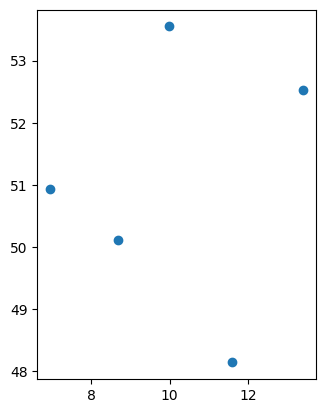

geopandas.geodataframe.GeoDataFrame

In [36]:
cities_gdf = gpd.GeoDataFrame(
    cities_df, geometry=gpd.points_from_xy(cities_df.Longitude, cities_df.Latitude), crs="EPSG:4326"
)
cities_gdf.plot()
plt.show()
type(cities_gdf)

#### Why did we choose CRS=EPSG:4326?

In [7]:
# gdf.crs  # our coordinates are in Longitude and Latitude - therefore 4326 is he correct coordinate reference system!

#### Task: Find the NUTS regions containing our five cities - using the geodata
- There are different ways to do this. For example you can use a nested for loop to check for each point individually. 
- check out the geom.within(geom2) and geom.contains(gemo2) functions in geopandas! Which one would help in your situation?
- Feel free to use Google/Documentation/ChatGPT!
- Also, don't forget to recheck the CRS of both geodataframes
- When you were able to do it, verify your results by plotting in one figure the cities and the corresponding regions. Style your plots with colors etc. to visualize the results well. 

In [ ]:
# remember the syntax for plotting two or more datasets in one figure
# fig, ax = plt.subplots(figsize=(5,5))
# ...plot(ax=ax)
# ...plot(ax=ax)
# plt.show()

In [ ]:
# first we need to make both geodataframes use the same CRS
# lets reproject the cities 
cities_gdf.to_crs(3035, inplace=True)

In [ ]:
# checking which point corresponds to which region
# Option 1: geom.contains(geom2) for geom in ...
# Option 2: gpd.sjoin(points, regions, op = 'within')
# Option 3: bare loops ?